Aubreigh DeFriece

 - Class

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [58]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns 


In [59]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [60]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 9)
X_train.shape

(240, 5)

In [62]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 9)

#create and fit the model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

R2_train = model_1.score(X_train, y_train)
R2_test = model_1.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test) 

print(model_1.__dict__)
print(coef)

print_model(model_1.intercept_, model_1.coef_, column_names, model_name = 'Model 1')

print(f'R2 train {R2_train:.2f}\nR2 test {R2_test:.2f}')
print(f'MSE train {MSE_train:.2f}\nMSE test {MSE_test:.2f}')

{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'n_features_in_': 5, 'coef_': array([21.52476416, 21.0447652 , 95.89526884,  6.65896819, 49.20515152]), 'rank_': 5, 'singular_': array([17.14087565, 16.37959118, 15.55438107, 14.33062407, 13.89550251]), 'intercept_': -6.884670944255215}
[21.87990264 21.20699885 96.62079325  6.92937604 48.31504389]
Model 1:
 y = -6.88 + 21.52*x1 + 21.04*x2 + 95.90*x3 + 6.66*x4 + 49.21*x5
R2 train 0.99
R2 test 0.99
MSE train 98.40
MSE test 85.50


#### Your written answers here

What are your model parameters?
 - -6.88 + 21.52*x1 + 21.04*x2 + 95.90*x3 + 6.66*x4 + 49.21*x5

What were your MSE and R^2?
 - MSE train 98.40
- MSE test 85.50
 - R2 train 0.99
- R2 test 0.99



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [63]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


In [64]:
reg2_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-0.019007,-0.081434,-0.014396,0.005781,0.041543,-0.030161,0.001037,-0.024288,-0.004252,-0.020702,-25.236430
1,0.008066,0.007271,-0.012255,-0.062581,0.032108,0.030362,-0.005309,-0.017288,0.012837,0.004792,-12.537903
2,0.032845,-0.063578,-0.009525,0.020147,-0.019702,-0.053699,-0.011607,-0.039859,-0.024391,-0.027195,-22.264183
3,-0.009999,-0.125704,0.015806,-0.008291,-0.057393,-0.063838,-0.005211,0.097825,-0.033332,-0.016052,-37.087455
4,-0.004742,0.057318,0.009264,-0.047371,0.032000,-0.038891,-0.037838,-0.076428,0.050613,-0.009998,-14.858578


<function matplotlib.pyplot.show(close=None, block=None)>

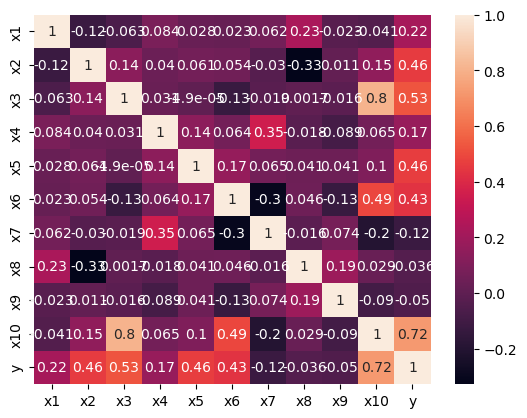

In [65]:
corr = reg2_df.corr()
sns.heatmap(corr, annot = True)
plt.show

In [66]:
candidate_idx = np.array([1, 2, 3, 4, 5, 6, 10])-1

Z = X[:, candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)
model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

print(f'R2 train {R2_train:.2f}\nR2 test {R2_test:.2f}')
print(f'MSE train {MSE_train:.2f}\nMSE test {MSE_test:.2f}')

R2 train 0.86
R2 test 0.89
MSE train 98.40
MSE test 85.50


#### Your written answers here

What are your model parameters?
 - -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6

Which features (x1, x2...) were significant? Which were co-linear?
 - x10 and x3 were significant because they are greater than 0.5
 - x3 and x10 are co-linear because they have a high correlation to each other
 
What were your MSE and R^2?
 - R2 train 0.86
 - R2 test 0.89
-  MSE train 98.40
- MSE test 85.50



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [67]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.drop(columns=['id', 'date', 'zipcode'], inplace=True)
housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
    - R2 train -1334861.42
    - R2 test -1270925.56

Which features are you using and why?
 
 - I am using bathrooms, square foot of living, and the grade because they have a significant correlation when compared to price.
  

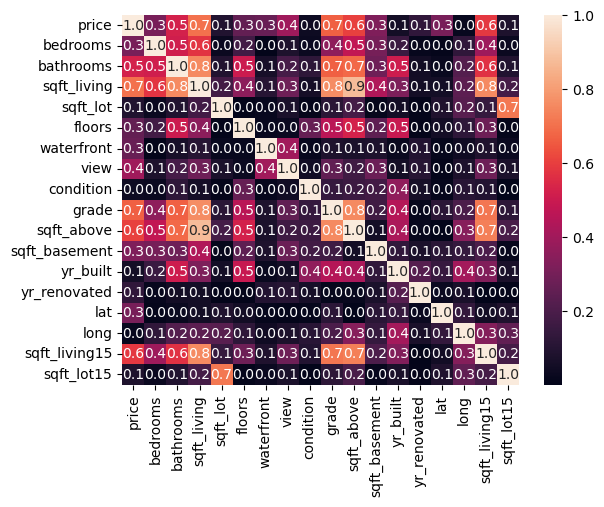

In [68]:
corr = housing_df.corr()

sns.heatmap(np.abs(corr), annot = True, fmt = '.1f')
plt.show()

#look for high correlations down from your target

In [69]:
X = housing_df[['bathrooms', 'sqft_living', 'grade']]
y = housing_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [74]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

model_linreg = LinearRegression()
model_linreg.fit(X_scaled_train, y_train)

R2_train = model_linreg.score(X_train, y_train)
R2_test = model_linreg.score(X_test, y_test)

print(f'R2 train {R2_train:.2f}\nR2 test {R2_test:.2f}')



R2 train -1334861.42
R2 test -1270925.56


c:\Users\17173\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\17173\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#### Your written answers here
Which features are you using and why?
 
 - I am using bathrooms, square foot of living, and the grade because they have a significant correlation when compared to price.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [ ]:
from sklearn.linear_model import Lasso, Ridge

# y = housing_df[['price']]
X = housing_df.drop(columns = ['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

ss = StandardScaler()
# 'fit' the scaler to the training data
# 'transform' the training and test data using the scalar

model_lasso = LinearRegression()
model_lasso.fit(X_train, y_train)

y_pred_train = model_lasso.predict(X_train)
y_pred_test = model_lasso.predict(X_test)

R2_train = model_lasso.score(X_train, y_train)
R2_test = model_lasso.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test) 


#missing steps for you to fill in
model_lasso = Lasso(alpha=0.5) #bad fit make alpha smaller
model_lasso.fit(X_scaled_train, y_train)

print(model_lasso.__dict__)
print(coef)


print(f'R2 train {R2_train:.2f}\nR2 test {R2_test:.2f}')
print(f'MSE train {MSE_train:.2f}\nMSE test {MSE_test:.2f}')
# Use the model to 'predict'

{'alpha': 0.5, 'l1_ratio': 1.0, 'fit_intercept': True, 'precompute': False, 'max_iter': 1000, 'copy_X': True, 'tol': 0.0001, 'warm_start': False, 'positive': False, 'random_state': None, 'selection': 'cyclic', 'n_features_in_': 3, 'n_iter_': 19, 'coef_': array([ 2090.04739179,   302.17850079, -2830.299137  ]), 'dual_gap_': 137.73525159051474, 'intercept_': array([539091.23377675])}
[55.42830221 77.9306604  94.14545931 16.29427767 57.10651453 79.89553296
  0.          0.          0.          0.        ]
R2 train 0.69
R2 test 0.72
MSE train 41843569957.00
MSE test 38046321336.03


### Your written answers here
Which regression did you use?
 - Lasso

Does your regularized model look better than your MLR? How so?
 - Yes, R2 have high correlations, whereas my MLR did not. 

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [82]:
# Your code here. Add cells as needed.
below_1M = housing_df[housing_df["price"] < 1000000]
above_1M = housing_df[housing_df["price"] >= 1000000]


print(f"Number below $1M: {below_1M.shape[0]}")
print(f"Number above $1M: {above_1M.shape[0]}")

Number below $1M: 20121
Number above $1M: 1492


In [84]:
X_below_scaled = scaler.fit_transform(X_below)
X_above_scaled = scaler.fit_transform(X_above)


X_below_train, X_below_test, y_below_train, y_below_test = train_test_split(X_below_scaled, y_below, test_size=0.2, random_state=42)
X_above_train, X_above_test, y_above_train, y_above_test = train_test_split(X_above_scaled, y_above, test_size=0.2, random_state=42)


lasso_below = Lasso(alpha=1000, random_state=42)  
lasso_below.fit(X_below_train, y_below_train)

lasso_above = Lasso(alpha=1000, random_state=42)  
lasso_above.fit(X_above_train, y_above_train)


y_below_pred = lasso_below.predict(X_below_test)
y_above_pred = lasso_above.predict(X_above_test)


print(f"R2 below $1M: {lasso_below.score(X_below_test, y_below_test):.2f}")
print(f"R2 above $1M: {lasso_above.score(X_above_test, y_above_test):.2f}")

R2 below $1M: 0.69
R2 above $1M: 0.55


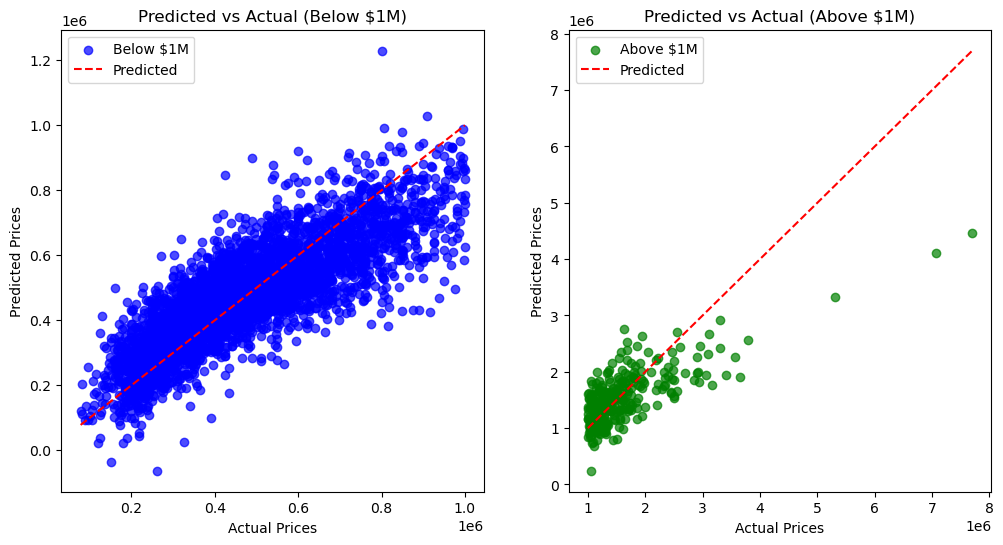

In [87]:
plt.figure(figsize=(12, 6))

# Below $1M 
plt.subplot(1, 2, 1)
plt.scatter(y_below_test, y_below_pred, alpha=0.7, color="blue", label="Below $1M")
plt.plot([y_below_test.min(), y_below_test.max()], [y_below_test.min(), y_below_test.max()], color="red", linestyle="--", label="Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual (Below $1M)")
plt.legend()

# Above $1M plot
plt.subplot(1, 2, 2)
if len(y_above_test) > 0:
    plt.scatter(y_above_test, y_above_pred, alpha=0.7, color="green", label="Above $1M")
    plt.plot([y_above_test.min(), y_above_test.max()], [y_above_test.min(), y_above_test.max()], color="red", linestyle="--", label="Predicted")
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Predicted vs Actual (Above $1M)")
    plt.legend()


plt.show()

 ### Your written answers here

 What are the $R^2$ for the two models?

  - below $1M = 0.69
  - above $1M = 0.55
 
